In [2]:
import pandas as pd
df = pd.read_csv("/Users/nimratsandhu/Documents/projects/fitsense/data/raw/heart-disease-dataset.zip")
for col, type in zip(df.columns, df.dtypes):
    print(f"{col}: {type}")

age: int64
sex: int64
cp: int64
trestbps: int64
chol: int64
fbs: int64
restecg: int64
thalach: int64
exang: int64
oldpeak: float64
slope: int64
ca: int64
thal: int64
target: int64


In [3]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [6]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


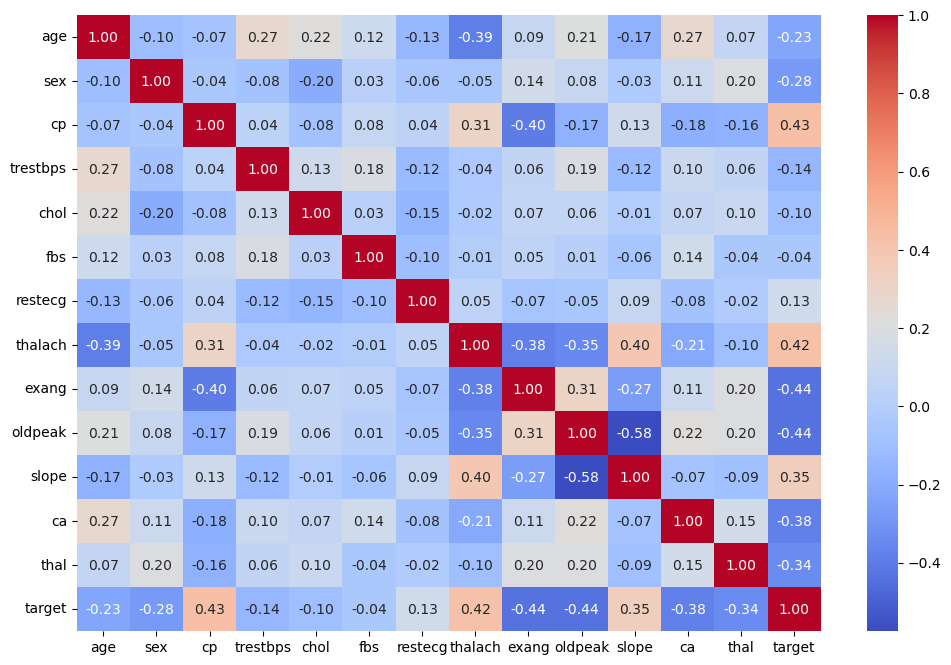

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Shows some multicolinearity between slope and oldpeak

In [8]:
from sklearn.linear_model import LogisticRegression

X = df[['oldpeak', 'slope']]
y = df['target']
model = LogisticRegression()
model.fit(X, y)
coeff_df = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)

         Coefficient
slope       0.515162
oldpeak    -0.818382
